#### Dataset Used : Titanic ( https://www.kaggle.com/c/titanic )

This dataset basically includes information regarding all the passengers on Titanic . Various attributes of passengers like age , sex , class ,etc. is recorded and final label 'survived' determines whether or the passenger survived or not .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
titanic_data_df = pd.read_csv('titanic-data.csv')

1.   **Survived:** Outcome of survival (0 = No; 1 = Yes)
2.  **Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
3.   **Name:** Name of passenger
4.  **Sex:** Sex of the passenger
5.  **Age:** Age of the passenger (Some entries contain NaN)
6.  **SibSp:** Number of siblings and spouses of the passenger aboard
7.  **Parch:** Number of parents and children of the passenger aboard
8.   **Ticket:** Ticket number of the passenger
9.   **Fare: **Fare paid by the passenger
10. **Cabin** Cabin number of the passenger (Some entries contain NaN)
11. **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

/home/kashif/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


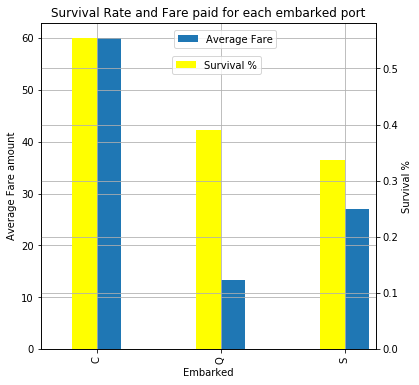

In [3]:
fig1 = plt.figure()
first_axis = fig1.add_subplot(111) 
second_axis = first_axis.twinx()

#The scales of the y-axis on the left and
# right hand side are different .

#group data by fare paid and port of embarkment
survived_df = titanic_data_df.groupby(['Embarked']).mean()[["Survived"]]
fare_df = titanic_data_df.groupby(['Embarked']).mean()[["Fare"]]

#plot data for fare and port of embarkment
fare_df.plot(kind='bar',grid=True,ax=first_axis,width=0.2,position=0)
survived_df.plot(kind='bar',color='yellow',ax=second_axis,grid=True,width=0.2, position=1,figsize=(6,6))

#set axis
first_axis.set_ylabel('Average Fare amount')
second_axis.set_ylabel('Survival %')

#display legend
first_axis.legend(["Average Fare"], loc="center", bbox_to_anchor=(0.55, 0.95))
second_axis.legend(["Survival %"],loc="center", bbox_to_anchor=(0.525, 0.87))

plt.title('Survival Rate and Fare paid for each embarked port')
fig1.show()

In [4]:
survived_df

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [5]:
fare_df

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


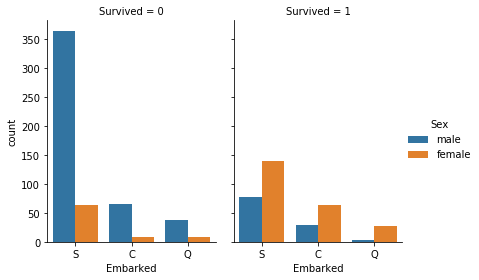

In [6]:
g = sns.catplot(x="Embarked", hue="Sex", col="Survived",
                 data=titanic_data_df, kind="count",
                 height=4, aspect=.7);

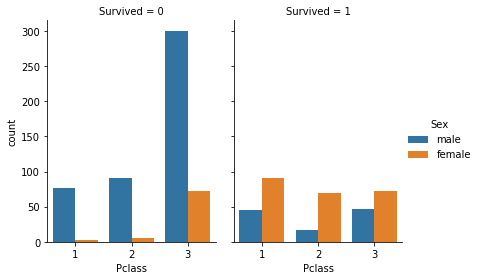

In [7]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                 data=titanic_data_df, kind="count",
                 height=4, aspect=.7);

## Add a new column - Family size   
I will be adding a new column 'Family Size' which will be the SibSp and Parch + 1

In [8]:
#Function to add new column 'FamilySize'
def add_family(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
    return df

titanic_data_df = add_family(titanic_data_df)
titanic_data_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


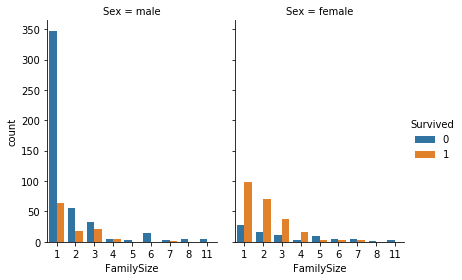

In [9]:
g = sns.catplot(x="FamilySize", hue="Survived", col="Sex",
                 data=titanic_data_df, kind="count",
                 height=4, aspect=.7);